In [1]:
%matplotlib inline

In [5]:
import galsim
import numpy as np 
import matplotlib.pyplot as plt 
import sys
from importlib import reload
sys.path.insert(0, '..')
import datasets

# Check that both datasets have similar parameters. 

## Original data set

background: 700.0
flux/background 0.29762405


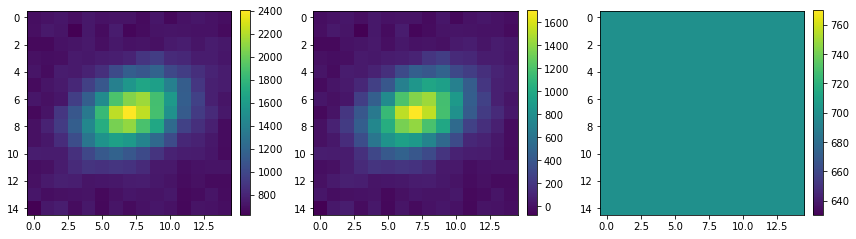

In [6]:
reload(datasets)
ds = datasets.Synthetic(15, min_galaxies=1, max_galaxies=1, mean_galaxies=1, num_images=1000,
                           centered=True)

dct = ds[0]
image, background, num_galaxies = dct['image'][0], dct['background'][0], dct['num_galaxies']

print('background:', np.mean(background))
print('flux/background', np.mean((image-background)/background))

fig = plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
im = plt.imshow(image)
plt.colorbar(im,fraction=0.046, pad=0.04)

plt.subplot(1,3,2)
im = plt.imshow(image-background)
plt.colorbar(im,fraction=0.046, pad=0.04)

plt.subplot(1,3,3)
im = plt.imshow(background)
plt.colorbar(im,fraction=0.046, pad=0.04)

plt.tight_layout()

# print(image-background)

## My data set

background: 700.0
flux/background 0.31837457


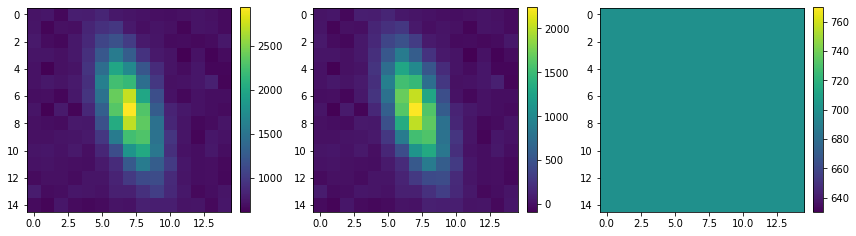

In [7]:
reload(datasets)
ds = datasets.GalBasic(15, min_galaxies=1, max_galaxies=1, mean_galaxies=1, num_images=1000,
                           centered=True, flux=50000, sky=700, snr=200)

dct = ds[0]
image, background, num_galaxies = dct['image'][0], dct['background'][0], dct['num_galaxies']

print('background:', np.mean(background))
print('flux/background', np.mean((image-background)/background))

fig = plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
im = plt.imshow(image)
plt.colorbar(im,fraction=0.046, pad=0.04)

plt.subplot(1,3,2)
im = plt.imshow(image-background)
plt.colorbar(im,fraction=0.046, pad=0.04)

plt.subplot(1,3,3)
im = plt.imshow(background)
plt.colorbar(im,fraction=0.046, pad=0.04)

plt.tight_layout()

## new size (30x30/40x40)


background: 700.0
flux/background 0.3183111


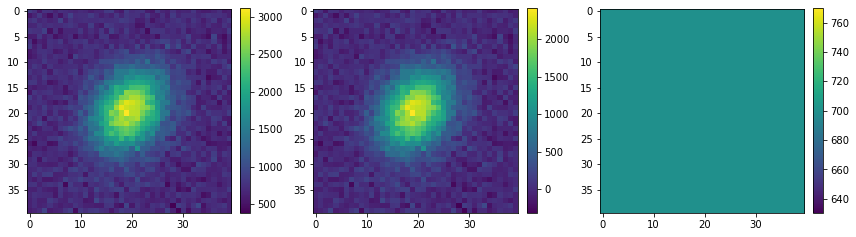

In [34]:
reload(datasets)
ds = datasets.GalBasic(40, min_galaxies=1, max_galaxies=1, mean_galaxies=1, num_images=1000,
                           centered=True, sky=700, snr=200)

dct = ds[0]
image, background, num_galaxies = dct['image'][0], dct['background'][0], dct['num_galaxies']

print('background:', np.mean(background))
print('flux/background', np.mean((image-background)/background))

fig = plt.figure(figsize=(12,12))
plt.subplot(1,3,1)
im = plt.imshow(image)
plt.colorbar(im,fraction=0.046, pad=0.04)

plt.subplot(1,3,2)
im = plt.imshow(image-background)
plt.colorbar(im,fraction=0.046, pad=0.04)

plt.subplot(1,3,3)
im = plt.imshow(background)
plt.colorbar(im,fraction=0.046, pad=0.04)

plt.tight_layout()

# Draw with galsim

flux: 699.75244


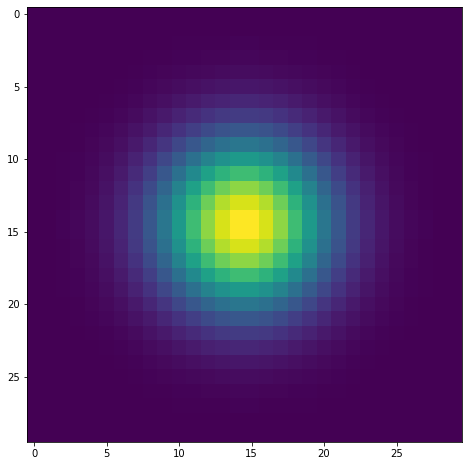

In [40]:
plt.figure(figsize=(8,8))
gal = galsim.Gaussian(flux=700, sigma=0.8)
image = gal.drawImage(nx = 30, ny = 30, scale=0.2, method='auto')

# print(image.array)
print('flux:', np.sum(image.array))
plt.imshow(image.array);



## Draw with photons 

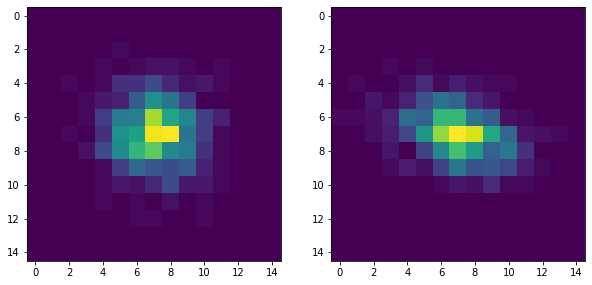

In [20]:
plt.figure(figsize=(10,10))
gal = galsim.Gaussian(flux=700, sigma=0.30622648635153007)
image = gal.drawImage(nx = 15, ny = 15, scale=0.2, method='phot',poisson_flux=True)

plt.subplot(1,2,1)
plt.imshow(image.array)

gal_1 = gal.shear(g1=0.2, g2=0.2)
im = gal_1.drawImage(nx = 15, ny = 15, scale=0.2, method='phot',poisson_flux=True).array
plt.subplot(1,2,2)
plt.imshow(im)

## add noise 

In [16]:
from copy import deepcopy 

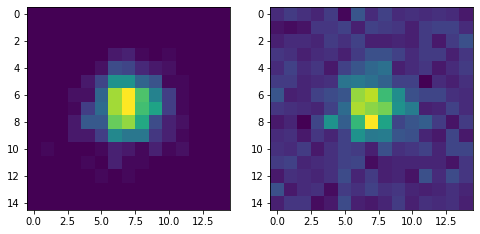

In [40]:
plt.figure(figsize=(8,8))
#add noise. 
sky=300
noisy_image = deepcopy(image)
rng = galsim.BaseDeviate(0)
noise = galsim.GaussianNoise(rng=rng)
noise = galsim.PoissonNoise(rng = rng, sky_level = sky)
snr=40
variance_noise = noisy_image.addNoiseSNR(noise, snr, preserve_flux=True)

plt.subplot(1,2, 1)
plt.imshow(image.array)
plt.subplot(1,2, 2)
plt.imshow(noisy_image.array)